# Visualization #

How to postprocess and visualize [Smurf](http://labs.statsbiblioteket.dk/smurf/) data? In this tutorial we will use Python with [matplotlib](https://matplotlib.org/) and [NumPy](http://www.numpy.org/) to manipulate and plot data.

**Python** is a great general-purpose programming language on its own, but with the help of a few popular libraries (numpy, scipy, matplotlib) it becomes a powerful environment for research.

In [1]:
import os
import pandas as pd

# path to file (change last string for other file)
PATH = os.path.join("..","data","smurf-2018-10-29_13_27.csv")

# import data as DataFrame
df = pd.read_csv(PATH,skiprows=[0,1])

# inspect data
print(df.head())

   year  total_articles  sur  glad
0  1750            2330  139    10
1  1751            3495  266     6
2  1752            4104  185     5
3  1753            5256  310     5
4  1754            5079  300     1


## Basic plotting of time series ##

### Build variables ###

First we extract the variables that we want to plot - articles frequency agains years in this case. We need NumPy in order to transform the raw article frequency to the relative (or weighted) frequency.

**NumPy** is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays.

In [2]:
import numpy as np

seeds = ["sur", "glad"]
x = df.year.values
w = df.total_articles.values.astype("float")

# raw article frequency
y1 = df.sur.values.astype("float")
y2 = df.glad.values.astype("float")

# relative article frequency
y1w = np.divide(y1, w, out=np.zeros_like(y1), where=w!=0)
y2w = np.divide(y2, w, out=np.zeros_like(y2), where=w!=0)

### Simple line plot ###

We plot relative article frequencies against time (year) using matplotlib

**matplotlib** is a plotting library for the Python programming language and its numerical mathematics extension NumPy.

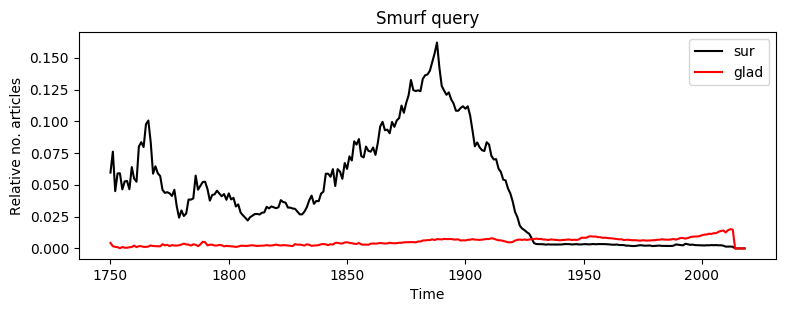

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', family='sans-serif')
plt.rc('text', usetex=False)

fig, ax = plt.subplots(1,1, figsize=(9,3), dpi=100)
ax.plot(x,y1w,"k",x,y2w,"r")

ax.legend(seeds)
ax.set_xlabel("Time")
ax.set_ylabel("Relative no. articles")
ax.set_title("Smurf query")

plt.show()

#### With multiple subplots ####

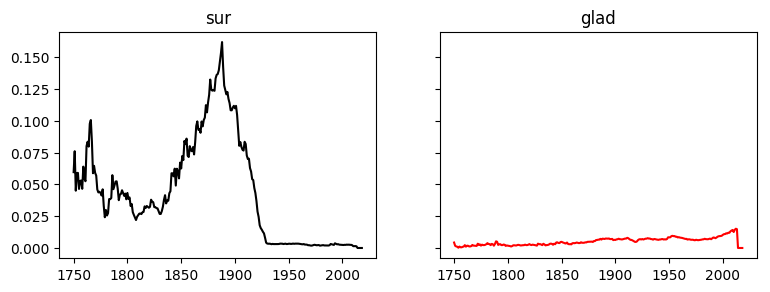

In [5]:
fig, ax = plt.subplots(1,2, figsize=(9,3), dpi=100, sharey=True)# try changing the share y axis property

ax[0].plot(x,y1w,"k")
ax[0].set_title(seeds[0])

ax[1].plot(x,y2w,"r")
ax[1].set_title(seeds[1])

plt.show()

### Effects of filtering ###

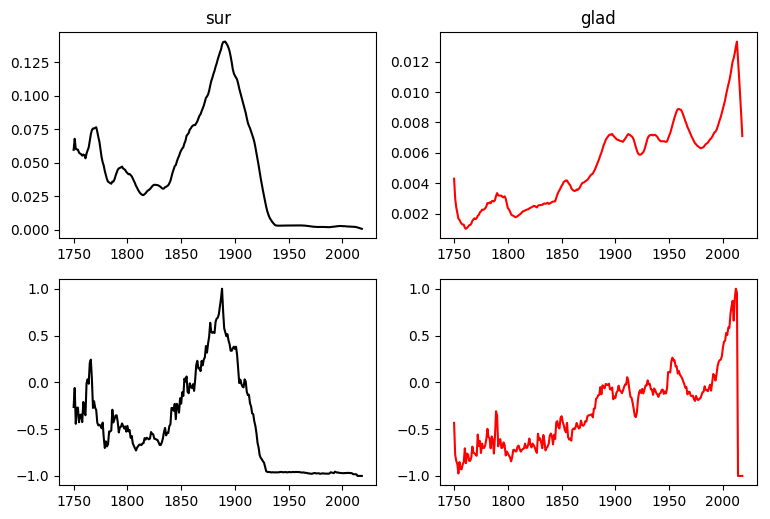

In [6]:
import numpy as np

def smooth(l, n = 5):
    """moving average filter with window size n"""
    sigma = 0
    res = list( 0 for x in l)
    for i in range(0 , n):
        sigma = sigma + l[i]
        res[i] = sigma / (i + 1)
    for i in range( n, len(l) ):
        sigma = sigma - l[i - n] + l[i]
        res[i] = sigma / n
    return res

def normalize(ts, scl01 = False):
    """nomalization in -1:1 range or if scl01 True, 0:1 range"""
    ts01 = (ts - np.min(ts)) / (np.max(ts) - np.min(ts))
    ts11 = 2 * ts01 -1
    if scl01:
        return ts01
    else:
        return ts11
    
fig, ax = plt.subplots(2,2, figsize=(9,6), dpi=100, sharey=False)

ax[0,0].plot(x,smooth(y1w,n=10),"k")
ax[0,0].set_title(seeds[0])

ax[0,1].plot(x,smooth(y2w,n=10),"r")
ax[0,1].set_title(seeds[1])

ax[1,0].plot(x,normalize(y1w),"k")

ax[1,1].plot(x,normalize(y2w),"r")

plt.show()

### Linear trend detection ###

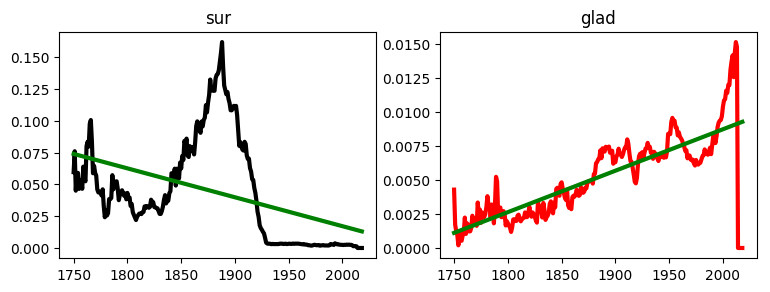

In [7]:
import numpy as np

# fit a straight line to the each time series
## sur trend
py1 = np.poly1d(np.polyfit(x,y1w,1))
## glad trend
py2 = np.poly1d(np.polyfit(x,y2w,1))

fig, ax = plt.subplots(1,2, figsize=(9,3), dpi=100)

ax[0].plot(x,y1w,"k", x, py1(x),'g-',linewidth=3)
ax[0].set_title(seeds[0])

ax[1].plot(x,y2w,"r", x, py2(x),'g-',linewidth=3)
ax[1].set_title(seeds[1])

plt.show()